In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("E:\\celebrity image classification\\test images\\dhoni_rare.jpg")
img.shape

(400, 570, 3)

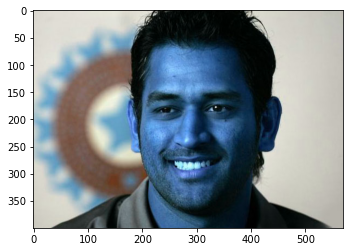

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(400, 570)

In [5]:
gray

array([[213, 213, 213, ..., 187, 185, 185],
       [213, 213, 213, ..., 187, 185, 185],
       [213, 213, 213, ..., 187, 185, 185],
       ...,
       [197, 197, 198, ..., 177, 177, 177],
       [197, 197, 198, ..., 177, 177, 177],
       [197, 197, 197, ..., 177, 177, 177]], dtype=uint8)

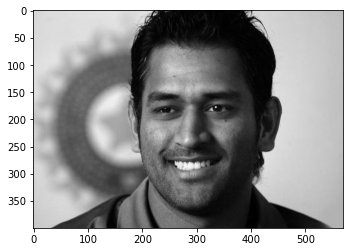

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\cv2\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\cv2\\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[168,  76, 256, 256]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(168, 76, 256, 256)

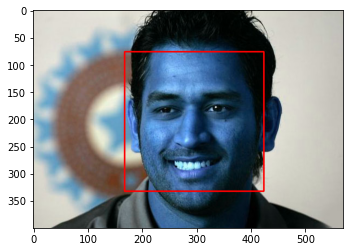

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

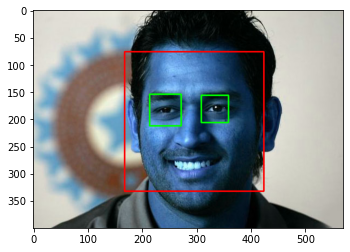

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

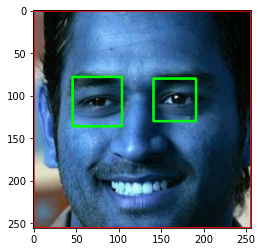

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

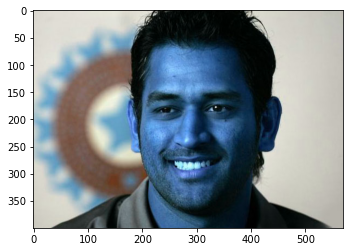

In [13]:
original_image = cv2.imread("E:\\celebrity image classification\\test images\\dhoni_rare.jpg")
plt.imshow(original_image)

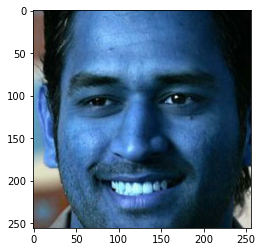

In [14]:
cropped_image = get_cropped_image_if_2_eyes("E:\\celebrity image classification\\test images\\dhoni_rare.jpg")
plt.imshow(cropped_image)

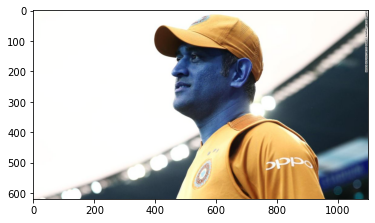

In [15]:
org_image_obstructed = cv2.imread("E:\\celebrity image classification\\test images\\dhoni_side.jpg")
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("E:\\celebrity image classification\\test images\\dhoni_side.jpg")
cropped_image_no_2_eyes

In [17]:
path_to_data ="E:celebrity image classification/datasets/"
path_to_cr_data ="E:/celebrity image classification/datasets/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['E:celebrity image classification/datasets/aishwarya rai',
 'E:celebrity image classification/datasets/ajith kumar',
 'E:celebrity image classification/datasets/cropped',
 'E:celebrity image classification/datasets/dhoni',
 'E:celebrity image classification/datasets/john cene',
 'E:celebrity image classification/datasets/smriti mandhana']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

aishwarya rai
Generating cropped images in folder:  E:/celebrity image classification/datasets/cropped/aishwarya rai
ajith kumar
Generating cropped images in folder:  E:/celebrity image classification/datasets/cropped/ajith kumar
cropped
dhoni
Generating cropped images in folder:  E:/celebrity image classification/datasets/cropped/dhoni
john cene
Generating cropped images in folder:  E:/celebrity image classification/datasets/cropped/john cene
smriti mandhana
Generating cropped images in folder:  E:/celebrity image classification/datasets/cropped/smriti mandhana


In [22]:
import pywt

In [24]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'aishwarya rai': ['E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai1.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai10.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai11.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai12.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai13.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai14.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai16.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai17.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai18.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwarya rai2.png',
  'E:/celebrity image classification/datasets/cropped/aishwarya rai\\aishwa

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'aishwarya rai': 0,
 'ajith kumar': 1,
 'dhoni': 2,
 'john cene': 3,
 'smriti mandhana': 4}

In [26]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [27]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     
len(X[0])

4096

In [28]:
len(X)

318

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(318, 4096)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.pipeline import Pipeline
pipeline1=Pipeline([('scaler',StandardScaler()),('model1',SVC(gamma='auto',probability=True))])
pipeline2=Pipeline([('scaler',StandardScaler()),('model2',RandomForestClassifier())])
pipeline3=Pipeline([('scaler',StandardScaler()),('model3',DecisionTreeClassifier())])
pipeline4=Pipeline([('scaler',StandardScaler()),('model4',LogisticRegression())])
pipelines=[pipeline1,pipeline2,pipeline3,pipeline4]
for pipe in pipelines:
    pipe.fit(X_train,y_train)
    print(pipe.score(X_test,y_test))

0.675
0.65
0.4875
0.7875


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
best_score=pipeline4.score(X_test,y_test)
best_score

0.7875

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pipeline4.predict(X_test))
cm

array([[19,  0,  1,  1,  2],
       [ 0, 10,  3,  0,  0],
       [ 0,  3,  9,  1,  1],
       [ 1,  1,  1, 21,  1],
       [ 0,  0,  1,  0,  4]], dtype=int64)

Text(69.0, 0.5, 'Truth')

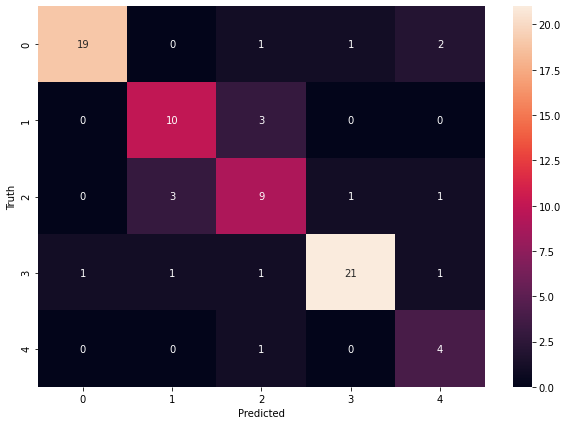

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(pipeline4,'new_saved_model.pkl') 

['new_saved_model.pkl']

In [38]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))